## Add resources

This notebook explores how to add other individual resources from Omnipath or other public databased.

In [1]:
%%time
from omniflow_project.core.network import Network
from omniflow_project._visual.visualize_network import NetworkVisualizer
from omniflow_project._inputs.resources import Resources
from omniflow_project._annotations.gene_ontology import Ontology
import omnipath as op

/home/eirini/anaconda3/envs/omniflow_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 1.63 s, sys: 464 ms, total: 2.09 s
Wall time: 2.4 s


## Adding a resource already in Omnipath



#### 1. Get all interactions from OmniPath

In [2]:
interactions = op.interactions.AllInteractions.get() 

#### 2. Add all interactions in the Resources object

In [3]:
resources = Resources()
resources.add_database(interactions)

In [4]:
resources.interactions

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,n_sources,n_primary_sources,n_references,references_stripped
0,P0DP23,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
1,P0DP25,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
2,P0DP24,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
3,Q03135,P48995,True,True,False,True,True,False,13,DIP:19897728;HPRD:12732636;IntAct:19897728;Lit...,DIP;HPRD;IntAct;Lit-BM-17;TRIP,post_translational,5,5,8,10980191;12732636;14551243;16822931;18430726;1...
4,P14416,P48995,True,True,False,True,True,False,1,TRIP:18261457,TRIP,post_translational,1,1,1,18261457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282499,5280360,P34995,True,False,False,False,False,False,3,Cellinker:10634944;Cellinker:11999132;Cellinke...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,3,10634944;11999132;16604093
282500,448457,P34995,True,False,False,False,False,False,1,Cellinker:11999132,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,1,11999132
282501,5311358,P48544,True,False,False,False,False,False,2,Cellinker:8688080;Cellinker:9804555,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,2,8688080;9804555
282502,439260,P35348,True,False,False,False,False,False,3,Cellinker:10433504;Cellinker:7651358;Cellinker...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,3,10433504;7651358;8564227


#### 3. Add interactions from a specific resource. 

#### 3A. Specify the interaction resource of interest

In [5]:
extra = op.interactions.LigRecExtra.get()

#### 3B. Add new resource to the Resources object

In [6]:
resources.add_database(extra, reset_index=True)

### 4. Build the network

#### 4A. Import genes as network nodes

In [7]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

In [8]:
new_net1 = Network(genes)

Loading deafault omnipath all interactions


In [9]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN
9,PTK2B,Q14289,NaN


#### 4B. Explore if the nodes are connected without introducing new intermidiate nodes

In [10]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

P12931 Q05397
P12931 P19022
P12931 Q14289
Q14289 Q05397
CPU times: user 907 ms, sys: 297 µs, total: 907 ms
Wall time: 906 ms


#### 4C. Visualize the network with the following command. 

The network picture is also exported in the working repository, in pdf format.

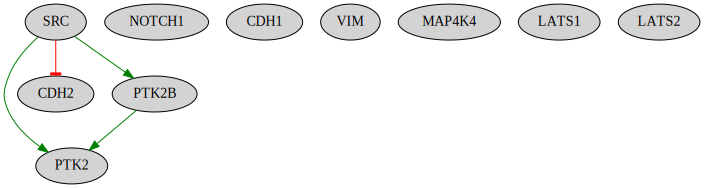

In [11]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render(output_file="new_network")

#### 4D. Connect disconnected nodes by importing intermediate nodes.

The parameter _*maxlen*_ is used to verify that in the network all the nodes have a distance < than maxlen. 

The parameter _*only_signed*_ forces the algorithm to look for just signed interactions. 

The parameter _*consensus*_ retrieves those interactions with a sign consensus between the references. 

The parameter _*connect_node_when_first_introduced*_, changes the base algorithm, making it look for possible connection between all the disconnected node in the network when a new bridge-gene is introduced in the network.

In [12]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=6, k_mean="tight", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
looking for paths in the network with length:  3  for node  SRC  and  NOTCH1
looking for paths in the network with length:  4  for node  SRC  and  NOTCH1
looking for paths in the network with length:  5  for node  SRC  and  NOTCH1
looking for paths in the network with length:  6  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  0  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  1  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  2  for node  SRC  and  NOTCH1
[['SRC', 'DAB1', 'NOTCH1'], ['SRC', 'CTNNB1', 'NOTCH1']]
P12931 O75553
O75553 P46531
P12931 P35222
P35222 P46531
P12931 Q05397
P12931 P19022
P12931 Q14289
P12931 O75553
P12931 P35222
O75553 P46531
P35222 P46531
Q14289 Q05397
P12830 P

#### 4E. Visualize final network

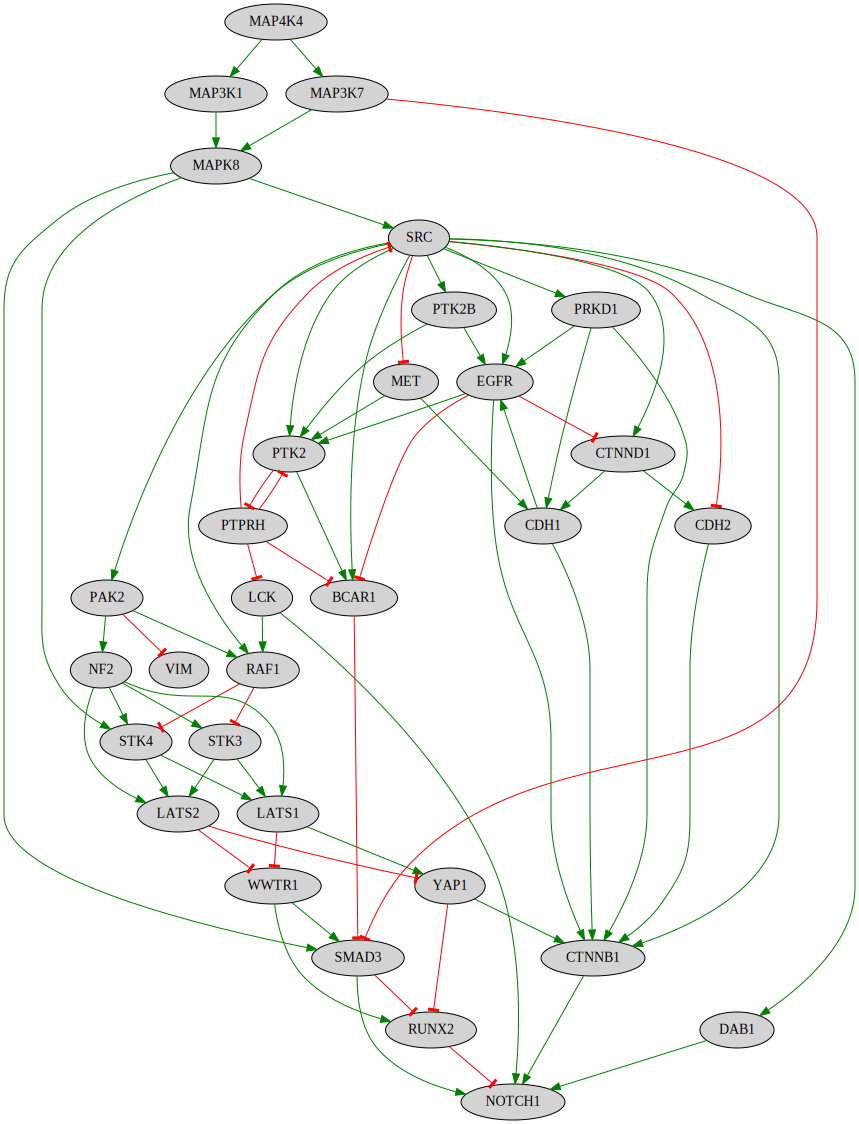

In [13]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render(output_file='network2')

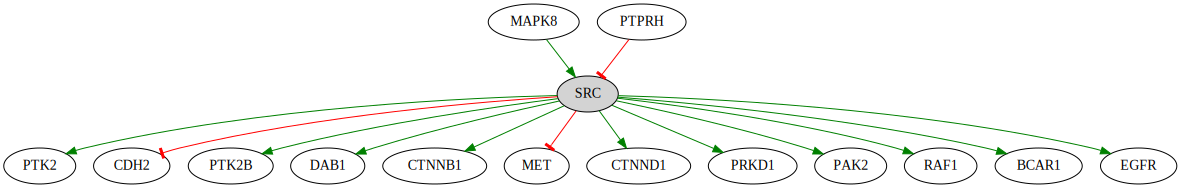

In [14]:
#Visualize a specific nodes and 
visualizer1 = NetworkVisualizer(new_net1, predefined_node = "SRC",color_by='effect')
visualizer1.render(output_file='network2')

In [15]:
#We can access to the edges of the network
new_net1.edges

,source,target,Type,Effect,References
6821,P12931,Q05397,None,stimulation,Adhesome:10085298;Adhesome:10592173;Adhesome:1...
32968,P12931,P19022,None,inhibition,ACSN:15782139;ACSN:16371504;ACSN:16492141;ACSN...
5154,P12931,Q14289,None,stimulation,Adhesome:10329689;Adhesome:10521452;Adhesome:1...
44795,Q14289,Q05397,None,stimulation,Adhesome:16760434;HPRD:16760434;KEA:12960434;K...
38417,P12931,O75553,None,stimulation,HPRD-phos:10959835;HPRD-phos:11279201;HPRD:109...
...,...,...,...,...,...
67482,P00533,Q05397,None,stimulation,ACSN:10545505;ACSN:16919435;ACSN:17496910;ACSN...
7631,Q14289,P00533,None,stimulation,CA1:11274221;HPRD:10777553;InnateDB:14963038;S...
73973,P00533,P35222,None,stimulation,ACSN:12040186;ACSN:14585353;ACSN:17496910;ACSN...
2907,Q15139,P00533,None,stimulation,CancerCellMap:10523301;CancerCellMap:2984676;C...


## Adding a public database

The whole tool, as the name suggest, is based on Omnipath. But the user can also integrate its own databases. 

As example, we show how to integrate the Signor database. In order to do so, the User needs to have already downloaded the whole Signor database, available at the following link: https://signor.uniroma2.it/downloads.php 

### Add Signor database



In [13]:
from urllib.request import urlretrieve
url = "https://signor.uniroma2.it/getData.php?organism=9606"
urlretrieve(url, "singor_db.tsv")

('singor_db.tsv', <http.client.HTTPMessage at 0x7fb31b63c940>)

In [17]:
resources = Resources()
resources.import_signor_tsv("all_data_04_04_24.tsv") # this function accept only tab separated values

In [18]:
%%time
new_net1 = Network(genes, resources=resources.interactions) # here we load the signor interactions

CPU times: user 49.8 ms, sys: 4.18 ms, total: 54 ms
Wall time: 52.1 ms


### Build network

NB! It is important to note, that not all the databases have the same structure as Omnipath. In particular, if the columns "consensus" are missing, we suggest to avoid to use the flag "consensus" or "consensus_only" when using Omniflow with customize databases.

In [19]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=6, k_mean="tight", only_signed=True,
                             connect_node_when_first_introduced=True) # here, consensus_only is missing, in this way it is automatically False

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
looking for paths in the network with length:  3  for node  SRC  and  NOTCH1
looking for paths in the network with length:  4  for node  SRC  and  NOTCH1
looking for paths in the network with length:  5  for node  SRC  and  NOTCH1
looking for paths in the network with length:  6  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  0  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  1  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  2  for node  SRC  and  NOTCH1
[['SRC', 'CTNNB1', 'NOTCH1'], ['SRC', 'DAB1', 'NOTCH1']]
P12931 P35222
P35222 P46531
P12931 O75553
O75553 P46531
P12931 Q05397
P12931 P12830
P12931 P19022
P12931 Q14289
P12931 P35222
P12931 O75553
P35222 P46531
O75553 P46531
Q14289 Q

### SIGNOR uses has different identifiers for complexes, protein family, phenotype, etc.

It is possible that the network contains nodes names like "Signor_pf32" or something like this... This is not yet translated, but if you are interested in what those nodes consist of, you can use download their vocabulary for the entities: https://signor.uniroma2.it/downloads.php

### Finally we can export the network in bnet format with some basic logical equations or in sif format for Cytoscape visualization

In [ ]:
from omniflow_project._outputs.exports import Exports

In [ ]:
export = Exports(new_net1)

In [ ]:
export.export_bnet()
export.export_sif()